In [4]:
!pip install pandas

     |████████████████████████████████| 12.4 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 99.4 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 94.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 90.8 MB/s eta 0:00:01


In [5]:
import pandas as pd

df = pd.read_csv("Diamond_Price_Prediction.csv")
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
import numpy as np
df.rename({'Price(in US dollars)': 'price'}, axis=1, inplace=True)
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,price,X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
!pip install scikit-learn

     |████████████████████████████████| 9.6 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 89.8 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 96.1 MB/s eta 0:00:01


In [10]:
def LABEL_ENCODING(string):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[string]= label_encoder.fit_transform(df[string])
    df[string].unique()
LABEL_ENCODING("Cut(Quality)")
LABEL_ENCODING("Color")
LABEL_ENCODING("Clarity")
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,price,X(length),Y(width),Z(Depth)
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [14]:
X = df.drop('price',axis=1)
y = df['price']
from sklearn.model_selection import train_test_split #split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 9)
(10788, 9)
(43152,)
(10788,)


In [16]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=5,random_state=0)
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [17]:
rf_score = RF.score(X_test,y_test)
rf_score

0.9774301041527679

In [19]:
y_pred = RF.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [21]:
print("Mean Absolute Error (MAE):", mae) #Lower values indicate better performance.
print("Mean Squared Error (MSE):", mse) #a lower MSE indicates that the model's predictions are closer to the actual values on average.
print("Root Mean Squared Error (RMSE):", rmse) #lower is better
print("R-squared (R2):", r2) #higher is better

Mean Absolute Error (MAE): 292.9869166357682
Mean Squared Error (MSE): 357770.7743508414
Root Mean Squared Error (RMSE): 598.1394271830285
R-squared (R2): 0.9774301041527679


In [22]:
# Create a DataFrame with y_pred and y_test
comparison_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Print the DataFrame
print(comparison_df)

       Predicted  Actual
10176     5018.8    4733
16083     7303.8    6424
13420     5159.0    5510
20407     9637.8    8770
8909      4755.6    4493
...          ...     ...
42208     1285.4    1289
3638      3403.6    3435
5508      4082.2    3847
19535     8616.2    8168
47950     2015.4    1917

[10788 rows x 2 columns]


In [26]:
!pip install matplotlib

     |████████████████████████████████| 11.6 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 18.5 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 112.0 MB/s eta 0:00:01
     |████████████████████████████████| 299 kB 111.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 90.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 92.8 MB/s eta 0:00:01


                    Feature  Importance
0  Carat(Weight of Daimond)    0.633938
7                  Y(width)    0.252970
3                   Clarity    0.065063
2                     Color    0.029613
6                 X(length)    0.005915
8                  Z(Depth)    0.005066
4                     Depth    0.003291
5                     Table    0.002581
1              Cut(Quality)    0.001564


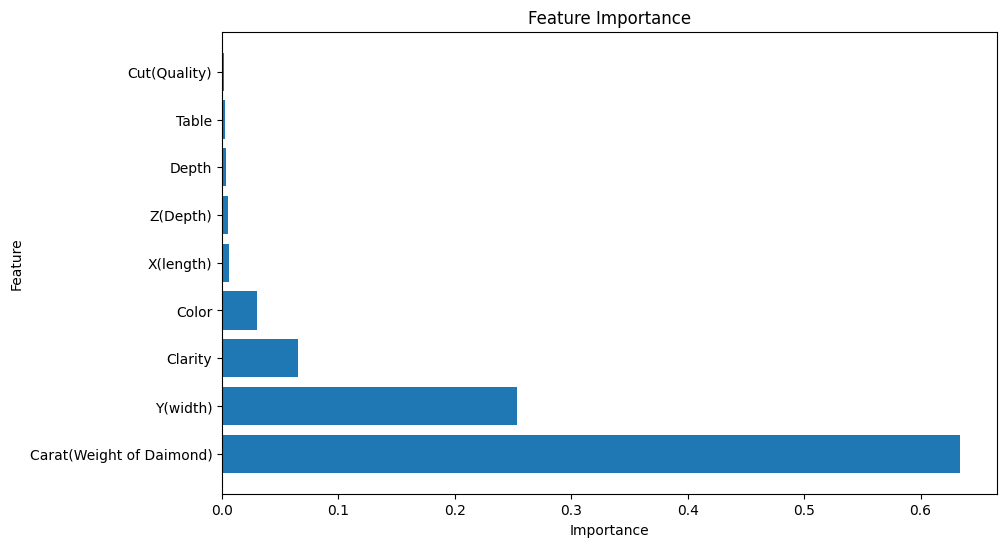

In [27]:
import matplotlib.pyplot as plt

# Get feature importances
importances = RF.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame with feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importance ranking
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [29]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a dummy model that predicts the mean of the target variable
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

# Generate predictions from the dummy model
dummy_predictions = dummy_model.predict(X_test)

# Calculate the performance metrics for the RandomForestRegressor model
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Calculate the performance metrics for the dummy model
dummy_mse = mean_squared_error(y_test, dummy_predictions)
dummy_r2 = r2_score(y_test, dummy_predictions)

# Print the performance metrics
print("RandomForestRegressor Model:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2):", rf_r2)

print("\nDummy Model:")
print("Mean Squared Error (MSE):", dummy_mse)
print("R-squared (R2):", dummy_r2)


RandomForestRegressor Model:
Mean Squared Error (MSE): 357770.7743508414
R-squared (R2): 0.9774301041527679

Dummy Model:
Mean Squared Error (MSE): 15851700.457497064
R-squared (R2): -1.2689029449397538e-06


In [30]:
comparison_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test, 'dummy': dummy_predictions})

# Print the DataFrame
print(comparison_df)

       Predicted  Actual      dummy
10176     5018.8    4733  3933.6967
16083     7303.8    6424  3933.6967
13420     5159.0    5510  3933.6967
20407     9637.8    8770  3933.6967
8909      4755.6    4493  3933.6967
...          ...     ...        ...
42208     1285.4    1289  3933.6967
3638      3403.6    3435  3933.6967
5508      4082.2    3847  3933.6967
19535     8616.2    8168  3933.6967
47950     2015.4    1917  3933.6967

[10788 rows x 3 columns]


In [31]:
import joblib

# Save the trained RandomForestRegressor model
joblib.dump(RF, 'model.pkl')


['model.pkl']